In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Training = pd.read_csv('../Cleaned_data/Training_TCGA_Risk_levels.csv')
MAYO = pd.read_csv('../Cleaned_data/MAYO_with_risk_levels.csv')
PIP = pd.read_csv('../Cleaned_data/Pipendo_with_risk_levels.csv')
Tubingen = pd.read_csv('../Cleaned_data/Tubingen_risk_groups.csv')

columns = ['Risk_level_PREOP', 'Risk_level_POSTOP', 'Risk_level_BM']


In [2]:
# Compare the value counts of each column in each dataset
for col in columns:
    print('Training', col)
    print(Training[col].value_counts())
    print('MAYO', col)
    print(MAYO[col].value_counts())
    print('PIP', col)
    print(PIP[col].value_counts())

Training Risk_level_PREOP
Risk_level_PREOP
Low        513
Unknown    297
High       142
Name: count, dtype: int64
MAYO Risk_level_PREOP
Risk_level_PREOP
Low        172
High        49
Unknown      5
Name: count, dtype: int64
PIP Risk_level_PREOP
Risk_level_PREOP
Low        272
High       131
Unknown     28
Name: count, dtype: int64
Training Risk_level_POSTOP
Risk_level_POSTOP
Low        676
High       256
Unknown     20
Name: count, dtype: int64
MAYO Risk_level_POSTOP
Risk_level_POSTOP
Low     157
High     68
Name: count, dtype: int64
PIP Risk_level_POSTOP
Risk_level_POSTOP
Low        135
High        97
Unknown      5
Name: count, dtype: int64
Training Risk_level_BM
Risk_level_BM
Low        596
High       245
Unknown    111
Name: count, dtype: int64
MAYO Risk_level_BM
Risk_level_BM
Unknown    177
Low         36
High        13
Name: count, dtype: int64
PIP Risk_level_BM
Risk_level_BM
Low     240
High    191
Name: count, dtype: int64


<Figure size 1000x1000 with 0 Axes>

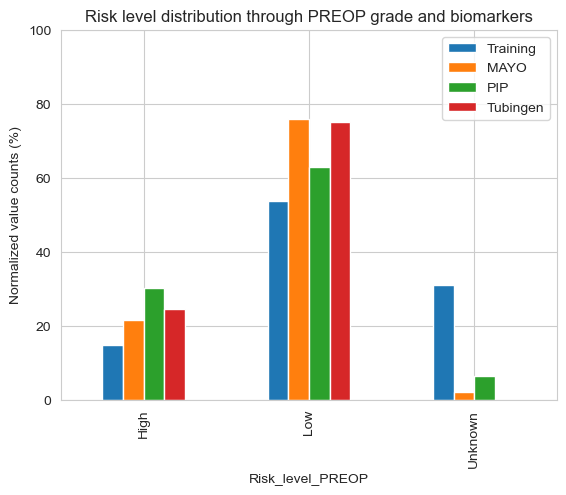

<Figure size 1000x1000 with 0 Axes>

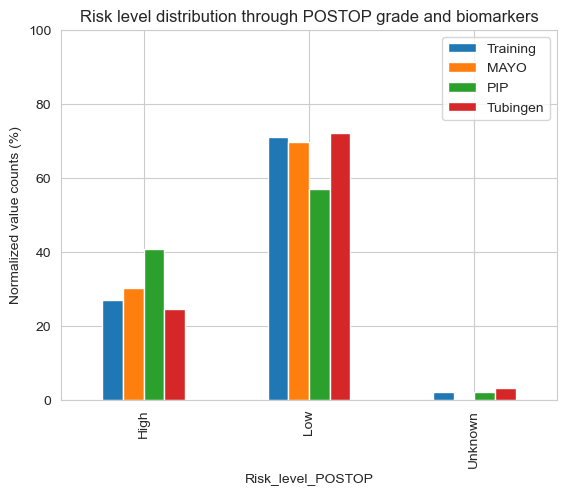

<Figure size 1000x1000 with 0 Axes>

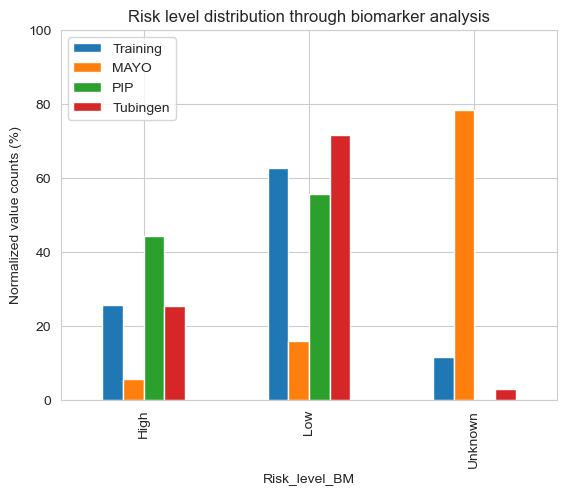

In [3]:
# Compare them in a bar plot side by side and in the same bar plot for the same column, normalized
# Create 3 subplots to display side by side


plt.figure(figsize=(10, 10))
PreOP = pd.DataFrame({'Training': Training['Risk_level_PREOP'].value_counts(normalize=True)*100,
                      'MAYO': MAYO['Risk_level_PREOP'].value_counts(normalize=True)*100,
                      'PIP': PIP['Risk_level_PREOP'].value_counts(normalize=True)*100,
                      'Tubingen': Tubingen['Risk_level_PREOP'].value_counts(normalize=True)*100})
PreOP.plot.bar()
plt.title('Risk level distribution through PREOP grade and biomarkers')
plt.ylabel('Normalized value counts (%)')
plt.ylim([0, 100])
         
plt.figure(figsize=(10, 10))

PostOp = pd.DataFrame({'Training': Training['Risk_level_POSTOP'].value_counts(normalize=True)*100,
                      'MAYO': MAYO['Risk_level_POSTOP'].value_counts(normalize=True)*100,
                      'PIP': PIP['Risk_level_POSTOP'].value_counts(normalize=True)*100,
                       'Tubingen': Tubingen['Risk_level_POSTOP'].value_counts(normalize=True)*100})
PostOp.plot.bar()

plt.title('Risk level distribution through POSTOP grade and biomarkers')
plt.ylabel('Normalized value counts (%)')
plt.ylim([0, 100])

plt.figure(figsize=(10, 10))
Mol = pd.DataFrame({'Training': Training['Risk_level_BM'].value_counts(normalize=True)*100,
                      'MAYO': MAYO['Risk_level_BM'].value_counts(normalize=True)*100,
                      'PIP': PIP['Risk_level_BM'].value_counts(normalize=True)*100,
                    'Tubingen': Tubingen['Risk_level_BM'].value_counts(normalize=True)*100})
Mol.plot.bar()

plt.title('Risk level distribution through biomarker analysis')
plt.ylabel('Normalized value counts (%)')
plt.ylim([0, 100])

    
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, 'Risk level distribution in Training dataset (N=952)')

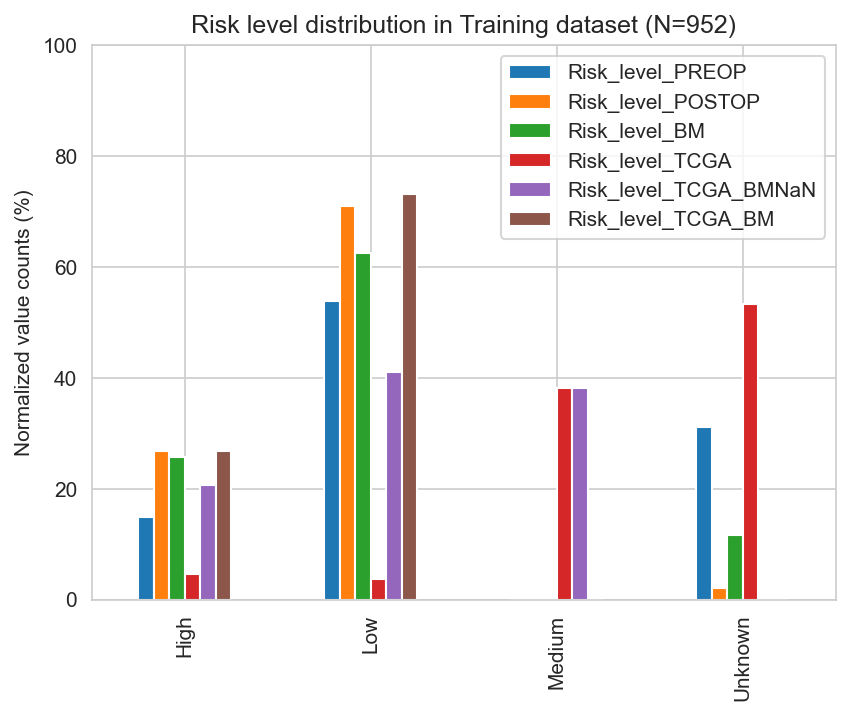

In [4]:
# Compare the risk levels within Training dataset seperated on risk level in the same bar plot
cols = ['Risk_level_PREOP', 'Risk_level_POSTOP', 'Risk_level_BM', 'Risk_level_TCGA']

data = pd.DataFrame(
    {'Risk_level_PREOP': Training['Risk_level_PREOP'].value_counts(normalize=True)*100,
     'Risk_level_POSTOP': Training['Risk_level_POSTOP'].value_counts(normalize=True)*100,
     'Risk_level_BM': Training['Risk_level_BM'].value_counts(normalize=True)*100,
     'Risk_level_TCGA': Training['Risk_level_TCGA'].value_counts(normalize=True)*100,
     'Risk_level_TCGA_BMNaN' : Training['Risk_level_TCGA_BMNaN'].value_counts(normalize=True)*100,
     'Risk_level_TCGA_BM' : Training['Risk_level_TCGA_BM'].value_counts(normalize=True)*100,
     })

data.plot.bar()
plt.ylim([0, 100])
plt.ylabel('Normalized value counts (%)')
plt.title('Risk level distribution in Training dataset (N=952)')


Text(0.5, 1.0, 'Risk level distribution in Tubingen dataset (N=247)')

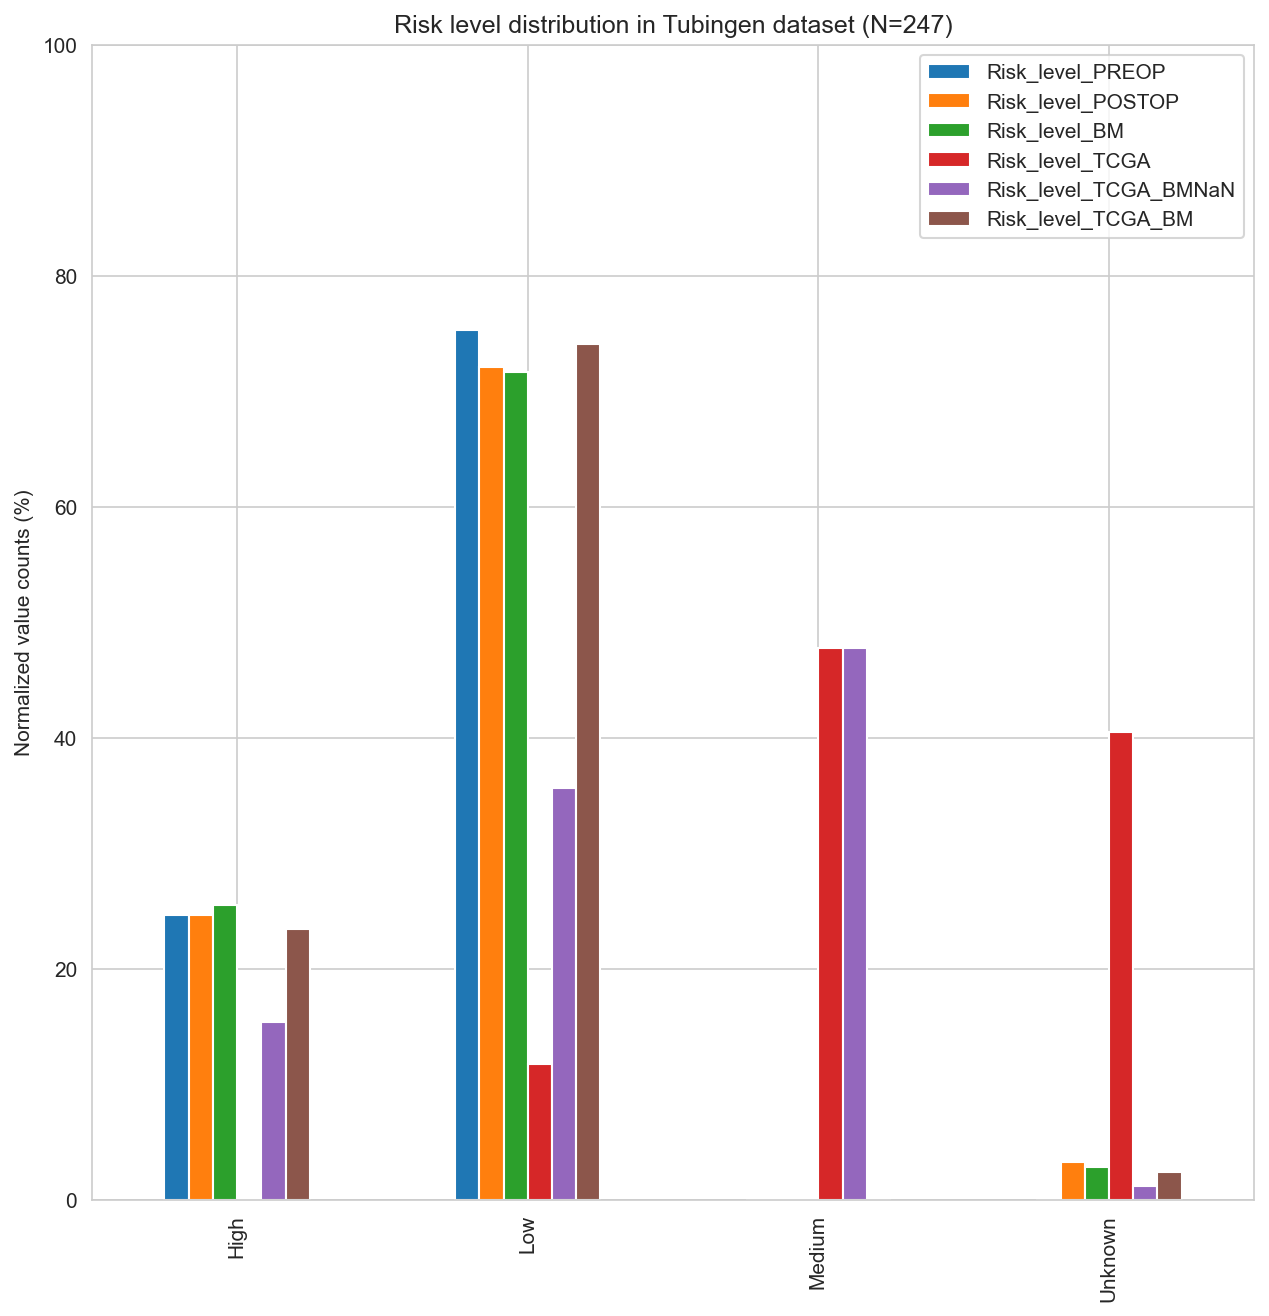

In [5]:
# Do the same for tubingen
cols = ['Risk_level_PREOP', 'Risk_level_POSTOP', 'Risk_level_BM', 'Risk_level_TCGA']

fig, axes = plt.subplots(1,1, figsize=(10, 10))
data = pd.DataFrame(
    {'Risk_level_PREOP': Tubingen['Risk_level_PREOP'].value_counts(normalize=True)*100,
     'Risk_level_POSTOP': Tubingen['Risk_level_POSTOP'].value_counts(normalize=True)*100,
     'Risk_level_BM': Tubingen['Risk_level_BM'].value_counts(normalize=True)*100,
     'Risk_level_TCGA': Tubingen['Risk_level_TCGA'].value_counts(normalize=True)*100,
     'Risk_level_TCGA_BMNaN' : Tubingen['Risk_level_TCGA_BMNaN'].value_counts(normalize=True)*100,
     'Risk_level_TCGA_BM' : Tubingen['Risk_level_TCGA_BM'].value_counts(normalize=True)*100,
     })
N = len(Tubingen)
data.plot.bar(ax=axes)
plt.ylim([0, 100])
plt.ylabel('Normalized value counts (%)')
plt.title(f'Risk level distribution in Tubingen dataset (N={N})')

Text(0.5, 1.0, 'Risk level distribution in MAYO dataset (N=226)')

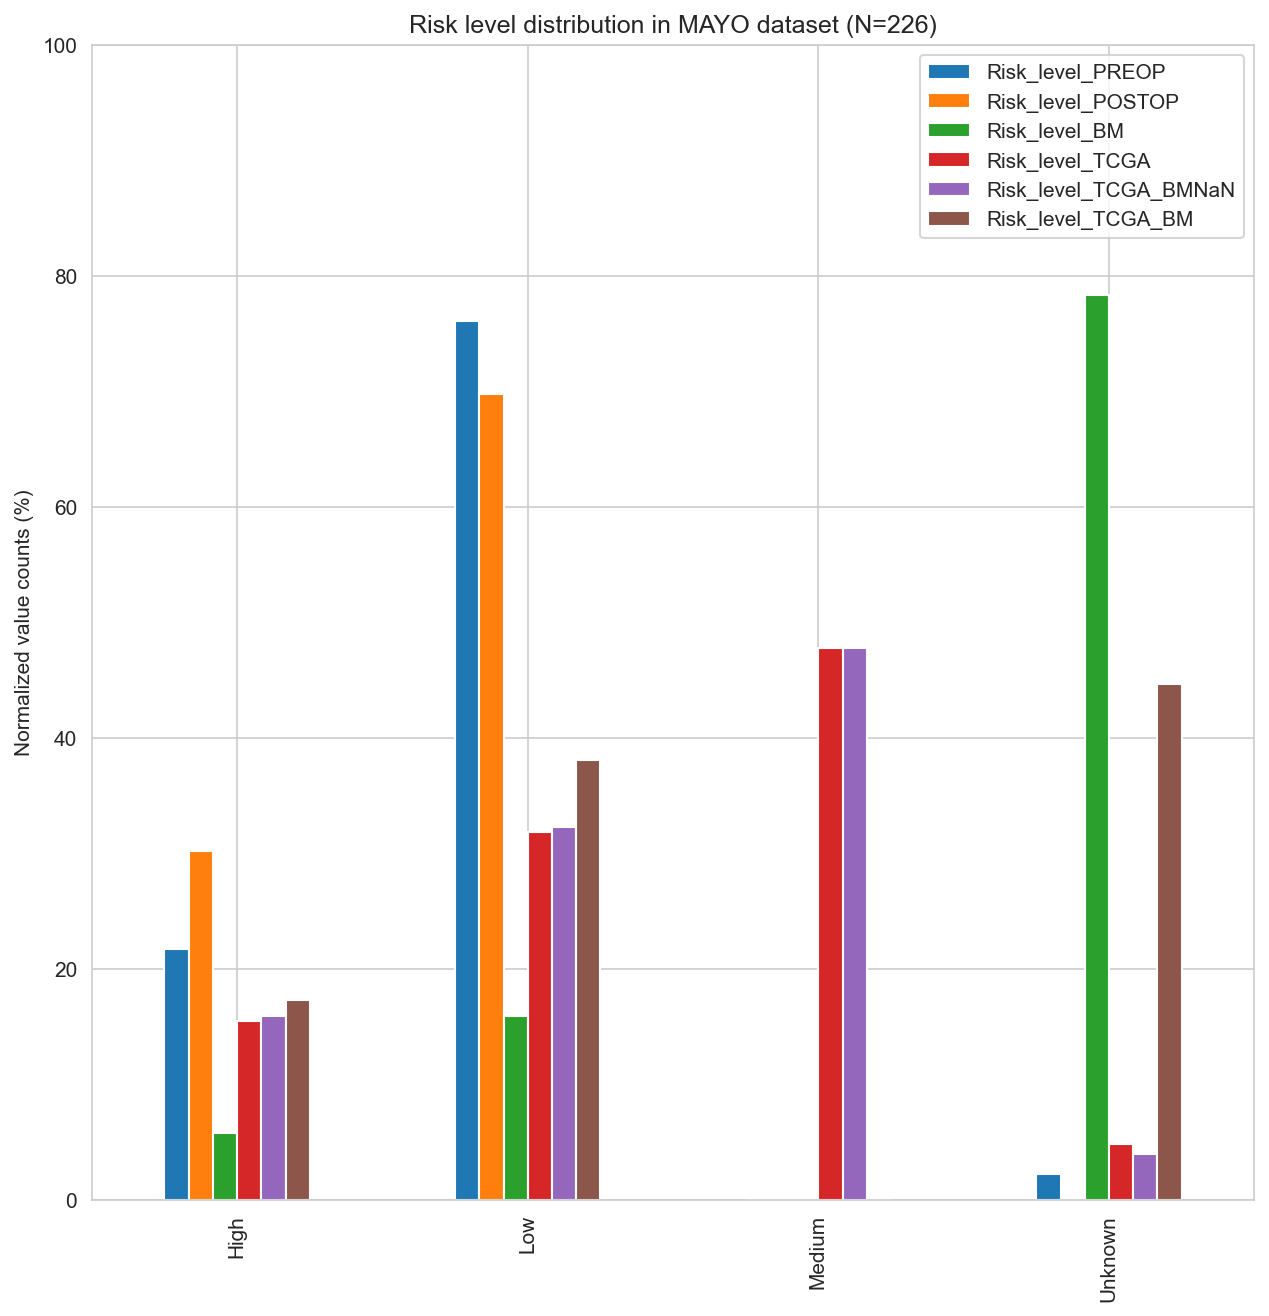

In [6]:
# And for MAYO
cols = ['Risk_level_PREOP', 'Risk_level_POSTOP', 'Risk_level_BM', 'Risk_level_TCGA']

fig, axes = plt.subplots(1,1, figsize=(10, 10))
data = pd.DataFrame(
    {'Risk_level_PREOP': MAYO['Risk_level_PREOP'].value_counts(normalize=True)*100,
     'Risk_level_POSTOP': MAYO['Risk_level_POSTOP'].value_counts(normalize=True)*100,
     'Risk_level_BM': MAYO['Risk_level_BM'].value_counts(normalize=True)*100,
     'Risk_level_TCGA': MAYO['Risk_level_TCGA'].value_counts(normalize=True)*100,
     'Risk_level_TCGA_BMNaN' : MAYO['Risk_level_TCGA_BMNaN'].value_counts(normalize=True)*100,
     'Risk_level_TCGA_BM' : MAYO['Risk_level_TCGA_BM'].value_counts(normalize=True)*100,
     })
N = len(MAYO)
data.plot.bar(ax=axes)
plt.ylim([0, 100])
plt.ylabel('Normalized value counts (%)')
plt.title(f'Risk level distribution in MAYO dataset (N={N})')

Text(0.5, 37.283333333333324, 'Risk level Postoperative grade and BM')

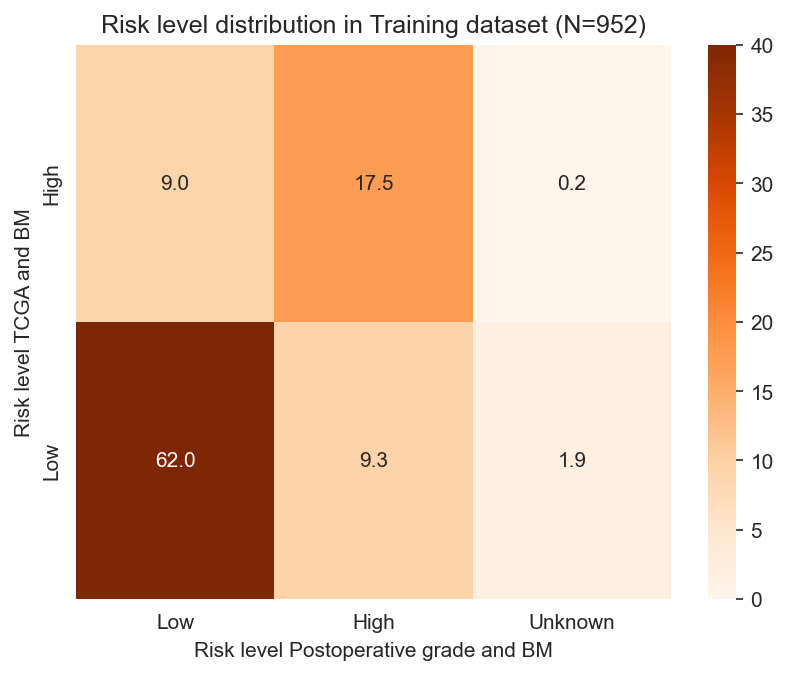

In [7]:
# Crosstable for Risk_level_TCGA_BM and RISK_level_POSTOP in the training dataset

crosstab = pd.crosstab(Training['Risk_level_TCGA_BM'], Training['Risk_level_POSTOP'], normalize=True)*100
crosstab = crosstab.reindex(['Low', 'High', 'Unknown'], axis='columns')
sns.heatmap(crosstab, annot=True, cmap='Oranges', fmt='.1f', vmin=0, vmax=40)

plt.title('Risk level distribution in Training dataset (N=952)')
plt.ylabel('Risk level TCGA and BM')
plt.xlabel('Risk level Postoperative grade and BM')

Comparison between the risk levels and Lymph node metastasis in a bar chart over all datasets, going to name all columns LNM_final_bi

In [8]:
for col in Training.columns:
    if 'TCGA' in col:
        print(col)

Preop_TCGA_And_Included_in_ENDORISK_bi
F_TCGA
Risk_level_TCGA
Risk_level_TCGA_BM
Risk_level_TCGA_BMNaN


In [9]:
PIP['Lymph_nodes_incl_recidief'].value_counts(dropna=False)

Lymph_nodes_incl_recidief
no LKD, no lymphatic recurrence             327
both negative                                57
no LKD, lymphatic recurrence                 19
positive nodes LKD                           12
both positive                                 8
negative nodes LKD, lymphatic recurrence      5
both unknown                                  3
Name: count, dtype: int64

In [10]:
Training['LNM_final_bi'] = Training['LNM_incl_followup_bi'].replace({0: 'No', 1: 'Yes'})
Tubingen['LNM_final_bi'] = Tubingen['LNM_obs'].replace({'negative': 'No', 'positive': 'Yes'})
MAYO['LNM_final_bi'] = MAYO['LNM_LNDorSLN'].replace({0: 'No', 1: 'Yes'})
PIP['LNM_final_bi'] = PIP['Pathology_Lymphnodes'].replace({'No Pathology Nodes': 'No', 'Nodes involved': 'Yes', np.nan:'Unknown'})


In [16]:
Training['LNM_final_bi'].value_counts(dropna=False)

LNM_final_bi
No     636
NaN    249
Yes     67
Name: count, dtype: int64

Text(0.5, 37.283333333333324, 'Risk level TCGA and BM')

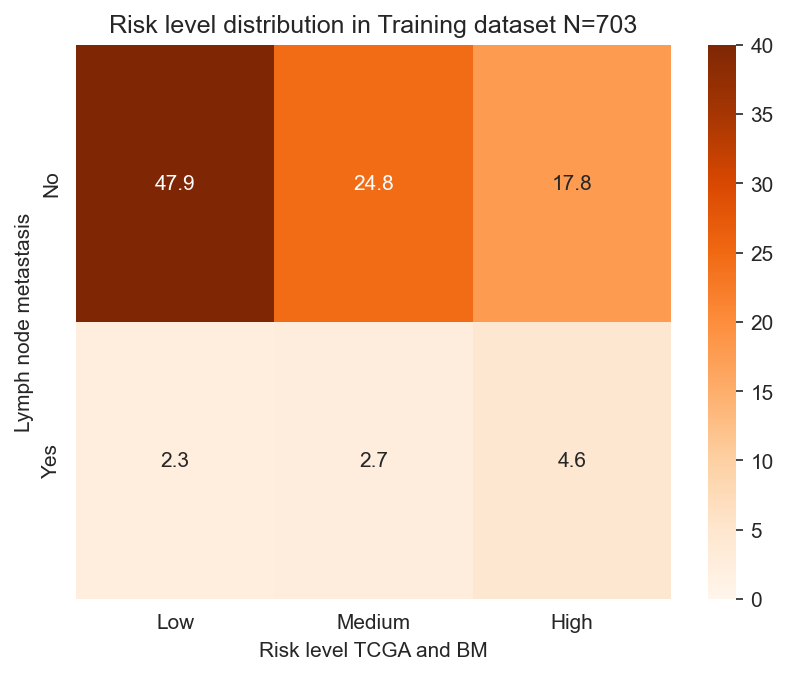

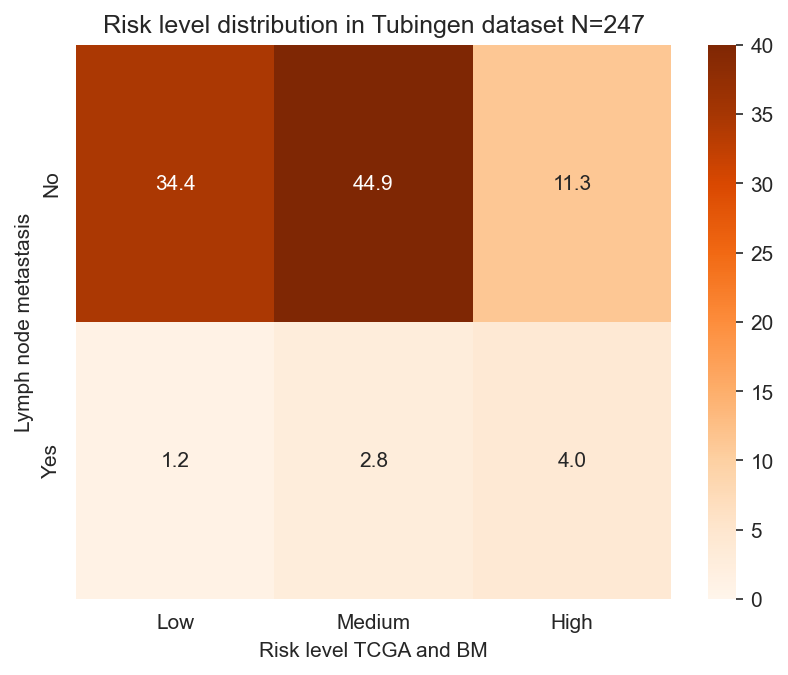

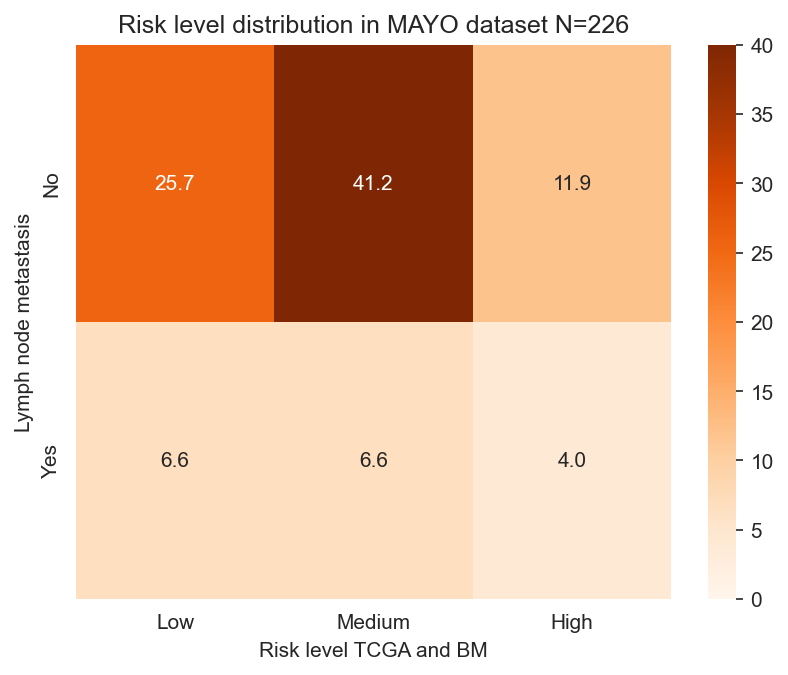

In [19]:
# Crosstab for LNM_final_bi and Risk_level_TCGA_BM for all datasets

# Training
plt.figure()
L = len(Training['LNM_final_bi'].dropna())
crosstab = pd.crosstab(Training['LNM_final_bi'], Training['Risk_level_TCGA_BMNaN'], normalize=True)*100
crosstab = crosstab.reindex(['No', 'Yes'])
crosstab = crosstab.reindex(['Low', 'Medium', 'High'], axis='columns')
sns.heatmap(crosstab, annot=True, cmap='Oranges', fmt='.1f', vmin=0, vmax=40)

plt.title(f'Risk level distribution in Training dataset N={L}')
plt.ylabel('Lymph node metastasis')
plt.xlabel('Risk level TCGA and BM')

# Tubingen
plt.figure()
L = len(Tubingen)
crosstab = pd.crosstab(Tubingen['LNM_final_bi'], Tubingen['Risk_level_TCGA_BMNaN'], normalize=True)*100
crosstab = crosstab.reindex(['No', 'Yes'])
crosstab = crosstab.reindex(['Low', 'Medium', 'High'], axis='columns')
sns.heatmap(crosstab, annot=True, cmap='Oranges', fmt='.1f', vmin=0, vmax=40)

plt.title(f'Risk level distribution in Tubingen dataset N={L}')
plt.ylabel('Lymph node metastasis')
plt.xlabel('Risk level TCGA and BM')

# MAYO
plt.figure()
L = len(MAYO)
crosstab = pd.crosstab(MAYO['LNM_final_bi'], MAYO['Risk_level_TCGA_BMNaN'], normalize=True)*100
crosstab = crosstab.reindex(['No', 'Yes'])
crosstab = crosstab.reindex(['Low', 'Medium', 'High'], axis='columns')
sns.heatmap(crosstab, annot=True, cmap='Oranges', fmt='.1f', vmin=0, vmax=40)

plt.title(f'Risk level distribution in MAYO dataset N={L}')
plt.ylabel('Lymph node metastasis')
plt.xlabel('Risk level TCGA and BM')

